<a href="https://colab.research.google.com/github/ridwanabdiansah29/Submission-Dicoding-ML-Terapan2/blob/main/Ridwan_Abdiansah_MLTerapan2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Content Based Filtering

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ridwanm193x0386
Your Kaggle Key: ··········


100%|██████████| 25.0M/25.0M [00:01<00:00, 14.7MB/s]


## Univariate Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import random

In [ ]:
df_new = pd.read_csv('/content/anime-recommendations-database/anime.csv')
df_new.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


Dari *output* di atas didapat bahwa:
- Kolom anime_id tipe datanya int64 sudah sesuai karena id berupa bilangan integer yang unique
- Kolom name dan genre tipe datanya object sudah sesuai karena tipe data string mempunyai batasan panjang karakter.

### Fitur anime_id

In [ ]:
print('Jumlah Anime Id: ', len(df_new.anime_id.unique()))
print('Jumlah Data:', len(df_new))

Jumlah Anime Id:  12294
Jumlah Data: 12294


Terlihat bahwa banyak anime_id jumlahnya sama dengan total banyak dataset. Hal ini menunjukkan bahwa untuk fitur anime_id, tidak ada data yang duplikat.

### Fitur name

In [ ]:
print('Jumlah Judul Anime: ', len(df_new.name.unique()))
print('Jumlah Data:', len(df_new))

Jumlah Judul Anime:  12292
Jumlah Data: 12294


Terlihat bahwa jumlah judul anime berbeda dengan total banyak data, hal ini terindikasi terdapat judul anime yang duplikat. Untuk mengatasinya kita akan menghapus data yang duplikat.

In [ ]:
# Cek name anime yang duplikat
df_row_duplicate = df_new[df_new.duplicated(['name'], keep=False)]
display(df_row_duplicate)

,anime_id,name,genre,type,episodes,rating,members
10140,22399,Saru Kani Gassen,Kids,OVA,1,5.23,62
10141,30059,Saru Kani Gassen,Drama,Movie,1,4.75,76
10193,33193,Shi Wan Ge Leng Xiaohua,"Comedy, Parody",ONA,12,6.67,114
10194,33195,Shi Wan Ge Leng Xiaohua,"Action, Adventure, Comedy, Fantasy, Parody",Movie,1,7.07,110


Kita akan hapus salah satu data yang duplikat.

In [ ]:
df_new.drop([10140, 10194], inplace=True)

Kemudian kita cek kembali

In [ ]:
print('Jumlah Judul Anime: ', len(df_new.name.unique()))
print('Jumlah Data:', len(df_new))

Jumlah Judul Anime:  12292
Jumlah Data: 12292


### Fitur genre

Mengecek data genre pada dataset

In [ ]:
list_genre_result = []

# Callback untuk mengambil genre yang unique
df_new.dropna(inplace=True)
def genre_handler(str_genre):
  list_genre = str_genre.split(',')
  for genre in list_genre:
    if genre.strip() not in list_genre_result:
      list_genre_result.append(genre.strip())

df_new['genre'].apply(genre_handler)
for genre in list_genre_result:
  print(genre)
print("Banyak Genre:", len(list_genre_result))

Drama
Romance
School
Supernatural
Action
Adventure
Fantasy
Magic
Military
Shounen
Comedy
Historical
Parody
Samurai
Sci-Fi
Thriller
Sports
Super Power
Space
Slice of Life
Mecha
Music
Mystery
Seinen
Martial Arts
Vampire
Shoujo
Horror
Police
Psychological
Demons
Ecchi
Josei
Shounen Ai
Game
Dementia
Harem
Cars
Kids
Shoujo Ai
Hentai
Yaoi
Yuri
Banyak Genre: 43


Dari hasil output di atas, pada dataset terdapat 43 jenis genre yang berbeda.

## Data Preprocessing

### Pilih fitur yang hanya digunakan yaitu (anime_id, name, genre)

In [ ]:
df_new = df_new[['anime_id', 'name', 'genre']]
df_new.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller"
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S..."


## Data Preparation

### Mengatasi Missing Value

In [ ]:
df_new.isnull().sum()

anime_id    0
name        0
genre       0
dtype: int64

Karena dari hasil output di atas menunjukkan bahwa tidak ada missing value pada dataset, maka kita akan melanjutkan ke tahap berikutnya.

### Mengatur Satu Kategori dalam Satu Anime

In [ ]:
list_new_genre = []

def one_genre_handler(str_genre):
  list_genre = str_genre.split(',')
  list_genre = [genre.strip() for genre in list_genre]
  random_genre = random.choice(list_genre)
  list_new_genre.append(random_genre) 

df_new['genre'].apply(one_genre_handler)
df_new.drop(['genre'], axis=1)
df_new['genre'] = list_new_genre
df_new.head()

,anime_id,name,genre
0,32281,Kimi no Na wa.,Romance
1,5114,Fullmetal Alchemist: Brotherhood,Military
2,28977,Gintama°,Comedy
3,9253,Steins;Gate,Sci-Fi
4,9969,Gintama&#039;,Samurai


## Model Development dengan Content Based Filtering

### TF-IDF Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(df_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'vampire',
 'yaoi',
 'yuri']

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(df_new['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(12015, 47)

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan nama anime
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=df_new.name
).sample(10, axis=1).sample(10, axis=0)

,comedy,josei,fantasy,harem,kids,military,martial,sports,ai,shoujo
name,,,,,,,,,,
Ai Sky Tree 21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ranpo Kitan: Game of Laplace,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hatsukoi Limited,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Doraemon: The Day When I Was Born,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hello Kitty no Nemureru Mori no Bijo,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Transformers Headmasters,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Kurenai no Buta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zettai Junpaku♡Mahou Shoujo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Goro-chan,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


### Cosine Similiraty

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import time
 
# Menghitung cosine similarity pada matrix tf-idf
start = time.time()
cosine_sim = cosine_similarity(tfidf_matrix) 
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama anime
cosine_sim_df = pd.DataFrame(cosine_sim, index=df_new['name'], columns=df_new['name'])
cosine_exec_time = time.time() - start
print("Exec Time Cosine Similarity (Seconds) :", cosine_exec_time)
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap anime
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Exec Time Cosine Similarity (Seconds) : 0.9556653499603271
Shape: (12015, 12015)


name,Sakurako-san no Ashimoto ni wa Shitai ga Umatteiru,Kwaegeol Longman Narongi,Shounen Tokugawa Ieyasu,Wonder Momo,Shuukan Shimakou Special
name,,,,,
Yuusei Shounen Papii,0.0,0.0,0.0,0.0,0.0
The Guts!,0.0,0.0,0.0,0.0,0.0
Lime-iro Senkitan,0.0,0.0,0.0,0.0,0.0
Ko Ko Ro,0.0,0.0,0.0,0.0,0.0
Nekketsu Saikyou Go-Saurer,0.0,0.0,0.0,0.0,0.0
Potemayo Specials,0.0,0.0,0.0,0.0,1.0
High School DxD BorN: Ishibumi Ichiei Kanzen Kanshuu! Mousou Bakuyou Kaijo Original Video,0.0,0.0,0.0,0.0,0.0
Doraemon Movie 06: Nobita no Little Star Wars,0.0,0.0,0.0,0.0,0.0
Midori no Neko,1.0,0.0,0.0,0.0,0.0


### Eucliden Distance

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

def euclidean_sim_handler(df_ohe, series_title):
  euclidean_dist = euclidean_distances(df_ohe) 
  f = lambda x: 1 / (1 + x)
  euclidean_sim = f(euclidean_dist)

  df_euclidean_sim = pd.DataFrame(euclidean_sim, index=series_title, columns=series_title)

  return df_euclidean_sim

In [ ]:
start = time.time()
# Menghitung cosine similarity pada matrix tf-idf
euclidean_sim_df = euclidean_sim_handler(tfidf_matrix, df_new['name']) 
euclidean_exec_time = time.time() - start
print("Exec Time Euclidean Similarity (Seconds) :", euclidean_exec_time)
print('Shape:', euclidean_sim_df.shape)
# Melihat similarity matrix pada setiap anime
euclidean_sim_df.sample(5, axis=1).sample(10, axis=0)

Exec Time Euclidean Similarity (Seconds) : 2.7271196842193604
Shape: (12015, 12015)


name,Mobile Suit Gundam Unicorn: One of Seventy Two,Hamster Sam,Blood-C: Special Edition,Doraemon Movie 12: Nobita no Dorabian Nights,Magical☆Star Kanon 100%
name,,,,,
Reunion (Music),0.414214,0.414214,0.414214,0.414214,1.000000
Gu-Gu Ganmo (Movie),0.414214,0.414214,0.414214,0.414214,0.414214
Baldr Force Exe Resolution,0.414214,0.414214,0.414214,0.414214,0.414214
Nakoruru: Ano Hito kara no Okurimono,0.414214,0.414214,0.414214,0.414214,0.414214
Eureka Seven AO,0.414214,0.414214,0.414214,0.414214,0.414214
Toriko,0.414214,0.414214,0.414214,0.414214,0.414214
Television,0.414214,0.414214,0.414214,0.414214,0.414214
Nyamen,0.414214,0.414214,0.414214,0.414214,0.414214
Ninja Mono,0.414214,0.414214,0.414214,0.414214,0.414214


### Mendapatkan Rekomendasi

In [ ]:
def anime_recommendations(nama_anime, similarity_data, items=df_new[['name', 'genre']], k=10):
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_anime].to_numpy().argpartition(
        range(-1, -k, -1)) # Ngambil 10 data terakhir setelah diurutkan dari kecil sampai besar
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_anime, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

### Rekomendasi dengan Cosine Similarity

In [ ]:
df_new[df_new.name.eq('Death Billiards')]

,anime_id,name,genre
477,14353,Death Billiards,Psychological


In [ ]:
anime_recommendations(
    nama_anime='Death Billiards',
    similarity_data=cosine_sim_df)

,name,genre
0,Ghost in the Shell: Stand Alone Complex - The ...,Psychological
1,Mahou Shoujo Madoka★Magica Movie 2: Eien no Mo...,Psychological
2,Imawa no Kuni no Alice (OVA),Psychological
3,Ninja &amp; Soldier,Psychological
4,Kakurenbo,Psychological
5,Ghost in the Shell: Arise - Border:2 Ghost Whi...,Psychological
6,Texhnolyze,Psychological
7,Tamala 2010: A Punk Cat in Space,Psychological
8,Nouryou Anime: Denkyuu Ika Matsuri,Psychological
9,Shigofumi,Psychological


### Rekomendasi dengan Euclidean Distance

In [ ]:
df_new[df_new.name.eq('Rental Magica')]

,anime_id,name,genre
2727,2369,Rental Magica,Fantasy


In [ ]:
anime_recommendations(
    nama_anime='Rental Magica',
    similarity_data=euclidean_sim_df)

,name,genre
0,Kyoukai no Kanata: Shinonome,Fantasy
1,Pokemon XY: Sora no Hahen,Fantasy
2,Mahoutsukai Tai! vs. Shamanic Princess,Fantasy
3,Jinrui wa Suitai Shimashita,Fantasy
4,Ukkari Pénélope OVA,Fantasy
5,Bishoujo Mobage: Mobami-chan,Fantasy
6,Arslan Senki (TV): Dakkan no Yaiba,Fantasy
7,Konna Watashitachi ga Nariyuki de Heroine ni N...,Fantasy
8,Vampire Hunter,Fantasy
9,Konna Watashitachi ga Nariyuki de Heroine ni N...,Fantasy


## Evaluasi

### Komparasi Waktu Eksekusi

In [ ]:
df_exec_time_models = pd.DataFrame(index=['Time (Seconds)'],
    columns=['Cosine Similarity', 'Euclidean Similarity'])

df_exec_time_models['Cosine Similarity'] = [cosine_exec_time]
df_exec_time_models['Euclidean Similarity'] = [euclidean_exec_time]

df_exec_time_models

,Cosine Similarity,Euclidean Similarity
Time (Seconds),0.955665,2.72712


dilihat dari output yang dihasilkan untuk menghitung kecepatan komparasi waktu eksekusi didapat cosine similarity dengan nilai 1.136652 detik sedangkan euclidean similarity mendapatkan waktu 3.268346

### Komparasi Metrik Precision

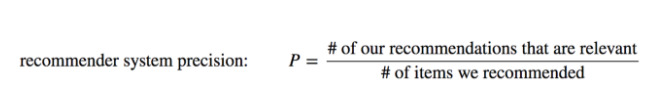

#### Precision Cosine Similarity


100%

# Kesimpulan

Pada kesimpulan ini didapatkan bahwa teknik cosine similarity dan teknik Euclidean Similarity sama-sama mendapatkan presisi yang akurat 100% dari percobaan hasil 9 output namun pada hal kecepatan waktu komparasi eksekusi teknik cosine similarity lebih unggul dari teknik Euclidean similarity.